In [40]:
import pandas as pd
from process_transcripts import process_transcripts
from transcript_stats import get_transcript_stats

process_transcripts()

df = get_transcript_stats()

df.head()

Processing transcripts/2013/2013-Nov-12-DPWGn.DE-140654996696-Transcript.txt...
  Skipping 2013-Nov-12-DPWGn.DE-140654996696-Transcript.txt, already processed.
Processing transcripts/2013/2013-May-08-7203.T-137290957349-Transcript.txt...
  Skipping 2013-May-08-7203.T-137290957349-Transcript.txt, already processed.
Processing transcripts/2013/2013-Apr-17-TSCO.L-138043584744-Transcript.txt...
  Skipping 2013-Apr-17-TSCO.L-138043584744-Transcript.txt, already processed.
Processing transcripts/2013/2013-Jan-29-LLY.N-138602223739-Transcript.txt...
  Skipping 2013-Jan-29-LLY.N-138602223739-Transcript.txt, already processed.
Processing transcripts/2013/2013-Mar-05-DPWGn.DE-138356575985-Transcript.txt...
  Skipping 2013-Mar-05-DPWGn.DE-138356575985-Transcript.txt, already processed.
Processing transcripts/2013/2013-Dec-05-KR.N-140861526577-Transcript.txt...
  Skipping 2013-Dec-05-KR.N-140861526577-Transcript.txt, already processed.
Processing transcripts/2013/2013-Jul-16-JNJ.N-140981724350-Tra

,ticker,year,month,day,filename,BrexitExposure,BrexitRisk,BrexitSentiment,NonBrexitRisk,NonBrexitSentiment
0,DPWGn.DE,2013,11,12,/Users/min/brexit-uncertainty/src/processed/20...,0.0,0.0,-0.0,4.0,73.0
1,BP.L,2013,07,30,/Users/min/brexit-uncertainty/src/processed/20...,0.0,0.0,-0.0,8.0,-57.0
2,LLY.N,2013,04,24,/Users/min/brexit-uncertainty/src/processed/20...,0.0,0.0,-0.0,1.0,2.0
3,ULVR.L,2013,01,23,/Users/min/brexit-uncertainty/src/processed/20...,0.0,0.0,-0.0,4.0,89.0
4,ULVR.L,2013,10,24,/Users/min/brexit-uncertainty/src/processed/20...,0.0,0.0,-0.0,4.0,10.0


In [42]:
import matplotlib.pyplot as plt

# Make sure year is numeric
df["year"] = df["year"].astype(int)

In [43]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Map tickers to company name and region (12 firms)
COMPANY_INFO = {
    # UK
    "TSCO.L":  ("Tesco", "UK"),
    "BARC.L":  ("Barclays", "UK"),
    "AZN.L":   ("AstraZeneca", "UK"),
    "BP.L":    ("BP", "UK"),

    # US
    "KR.N":    ("Kroger", "US"),
    "F.N":     ("Ford", "US"),
    "JNJ.N":   ("Johnson & Johnson", "US"),
    "KHC.OQ":  ("Kraft Heinz", "US"),
    "KRFT.O":  ("Kraft Heinz", "US"),  # pre-merger Kraft Foods

    # Multi-national
    "DPWGn.DE":("DHL", "Multi-national"),
    "7203.T":  ("Toyota", "Multi-national"),
    "LLY.N":   ("Eli & Lilly", "Multi-national"),
    "ULVR.L":  ("Unilever", "Multi-national"),
}

# Add company and region columns
df["company"] = df["ticker"].map(lambda t: COMPANY_INFO.get(t, (t, "Other"))[0])
df["region"]  = df["ticker"].map(lambda t: COMPANY_INFO.get(t, (t, "Other"))[1])

# Restrict to the 12-firm sample
target_tickers = list(COMPANY_INFO.keys())
analysis_df = df[df["ticker"].isin(target_tickers)].copy()

# Ensure year is numeric/integer
analysis_df["year"] = analysis_df["year"].astype(int)

metrics = [
    "BrexitExposure",
    "BrexitRisk",
    "BrexitSentiment",
    "NonBrexitRisk",
    "NonBrexitSentiment",
]


# By firm

In [44]:
summary_by_metric = (
    df[
        [
            "BrexitRisk",
            "BrexitExposure",
            "BrexitSentiment",
            "NonBrexitRisk",
            "NonBrexitSentiment",
        ]
    ]
    .agg(["mean", "std", "median"])
    .round(4)
)
summary_by_metric.transpose()

,mean,std,median
BrexitRisk,0.4461,3.0439,0.0000
BrexitExposure,0.0001,0.0002,0.0000
BrexitSentiment,0.4284,10.1850,0.0000
NonBrexitRisk,5.7410,5.5983,5.0000
NonBrexitSentiment,58.8812,55.3339,54.8889


In [45]:
desc_by_firm = (
    analysis_df
    .groupby(["region", "company"])[metrics]
    .agg(["mean", "median", "std"])
    .round(4)
)

total_by_firm = (
    analysis_df
    .assign(region="All", company="TOTAL")
    .groupby(["region", "company"])[metrics]
    .agg(["mean", "median", "std"])
    .round(4)
    .loc[[("All", "TOTAL")]]
)

desc_by_firm_with_total = pd.concat([desc_by_firm, total_by_firm])

desc_by_firm_with_total

BrexitExposure                 BrexitRisk  \
                                           mean  median     std       mean   
region         company                                                       
Multi-national DHL                       0.0000  0.0000  0.0001     0.7799   
               Eli & Lilly               0.0000  0.0000  0.0000     0.0000   
               Toyota                    0.0000  0.0000  0.0000     0.0000   
               Unilever                  0.0000  0.0000  0.0001     0.0000   
UK             AstraZeneca               0.0000  0.0000  0.0001     0.0000   
               BP                        0.0000  0.0000  0.0000     0.0000   
               Barclays                  0.0004  0.0001  0.0005     3.6222   
               Tesco                     0.0001  0.0000  0.0001     0.0000   
US             Ford                      0.0001  0.0000  0.0003     0.2796   
               Johnson & Johnson         0.0000  0.0000  0.0000     0.0000   
               Kraft Heinz               0.0000  0.0000  0.0000     0.0000   
               Kroger                    0.0000  0.0000  0.0000     0.0000   
All            TOTAL                     0.0001  0.0000  0.0002     0.4672   

                                                BrexitSentiment         \
                                 median     std            mean median   
region         company                                                   
Multi-national DHL                  0.0  4.8077         -1.4298   -0.0   
               Eli & Lilly          0.0  0.0000          0.0000   -0.0   
               Toyota               0.0  0.0000          0.0000   -0.0   
               Unilever             0.0  0.0000          0.9532   -0.0   
UK             AstraZeneca          0.0  0.0000          0.0000   -0.0   
               BP                   0.0  0.0000          0.0000   -0.0   
               Barclays             0.0  7.8382          3.6222   -0.0   
               Tesco                0.0  0.0000         -0.6708   -0.0   
US             Ford                 0.0  2.0354          2.3920   -0.0   
               Johnson & Johnson    0.0  0.0000          0.0000   -0.0   
               Kraft Heinz          0.0  0.0000          0.0000   -0.0   
               Kroger               0.0  0.0000          0.0000   -0.0   
All            TOTAL                0.0  3.1136          0.5303   -0.0   

                                          NonBrexitRisk                   \
                                      std          mean   median     std   
region         company                                                     
Multi-national DHL                 7.7432        4.3254   4.5000  5.0045   
               Eli & Lilly         0.0000        6.8056   7.0000  3.7019   
               Toyota              0.0000        1.0638   0.0000  1.9270   
               Unilever            4.1550        4.3684   4.0000  2.1398   
UK             AstraZeneca         4.3294        9.7222   9.0000  3.1588   
               BP                  0.0000        9.2778   8.0000  5.9503   
               Barclays           28.2694       12.4222  13.1818  9.7009   
               Tesco               3.4855        5.1852   3.0000  4.1328   
US             Ford               12.3234        4.4940   4.0000  3.2084   
               Johnson & Johnson   0.0000        3.8889   3.0000  3.0311   
               Kraft Heinz         0.0000        4.9429   4.0000  3.4380   
               Kroger              0.0000        2.8889   2.0000  3.8305   
All            TOTAL              10.3480        5.8120   5.0000  5.6900   

                                 NonBrexitSentiment                  
                                               mean median      std  
region         company                                               
Multi-national DHL                          79.3246   77.5  40.2545  
               Eli & Lilly                  41.3056   34.5  32.7997  
               Toyota           

# Over time (by year)

In [46]:
desc_by_year = (
    analysis_df
    .groupby("year")[metrics]
    .agg(["mean", "median", "std"])
    .round(4)
)

total_by_year = (
    analysis_df
    .assign(year="TOTAL")
    .groupby("year")[metrics]
    .agg(["mean", "median", "std"])
    .round(4)
    .loc[["TOTAL"]]
)

desc_by_year_with_total = pd.concat([desc_by_year, total_by_year])

desc_by_year_with_total


BrexitExposure                BrexitRisk                BrexitSentiment  \
                mean median     std       mean median     std            mean   
year                                                                            
2013          0.0000    0.0  0.0000     0.0000    0.0  0.0000          0.0000   
2014          0.0000    0.0  0.0000     0.0000    0.0  0.0000          0.0000   
2015          0.0000    0.0  0.0000     0.0000    0.0  0.0000          0.0000   
2016          0.0002    0.0  0.0004     0.8891    0.0  3.5549          1.8111   
2017          0.0001    0.0  0.0002     0.3087    0.0  2.1388          0.3773   
2018          0.0001    0.0  0.0003     1.2348    0.0  5.9848          0.7546   
2019          0.0001    0.0  0.0003     1.6107    0.0  5.6129          1.9686   
2020          0.0001    0.0  0.0002     0.2964    0.0  2.0956         -0.3622   
2021          0.0000    0.0  0.0000     0.0000    0.0  0.0000          0.3622   
TOTAL         0.0001    0.0  0.0002     0.4672    0.0  3.1136          0.5303   

                      NonBrexitRisk                NonBrexitSentiment         \
      median      std          mean median     std               mean median   
year                                                                           
2013    -0.0   0.0000        5.0377    4.0  5.0037            49.9811   33.0   
2014    -0.0   0.0000        5.7547    5.0  5.3346            47.3396   37.0   
2015    -0.0   0.0000        5.7174    4.0  5.4515            63.7826   54.5   
2016    -0.0  15.1970        5.1509    5.0  4.6848            55.1289   55.5   
2017    -0.0  12.1001        5.7121    5.0  4.3968            62.4352   61.0   
2018    -0.0   8.3192        5.2027    4.5  7.1327            64.0995   66.0   
2019    -0.0  23.2965        4.1067    4.0  4.7543            69.0749   66.0   
2020    -0.0   4.4664        8.0236    5.5  6.3197            50.4022   54.5   
2021    -0.0   2.5613        7.4800    6.0  6.8280            75.4378   82.0   
TOTAL   -0.0  10.3480        5.8120    5.0  5.6900            59.4404   56.5   

                
           std  
year            
2013   60.7604  
2014   59.2335  
2015   57.6599  
2016   52.1008  
2017   53.7068  
2018   48.2483  
2019   68.0021  
2020   54.8004  
2021   48.1315  
TOTAL  56.3707

# Time series with event markers

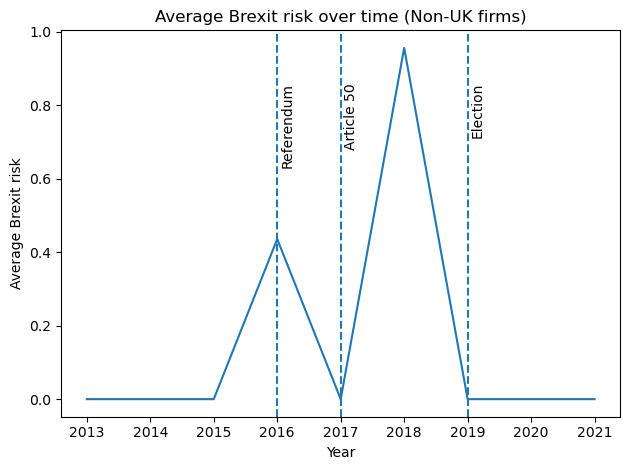

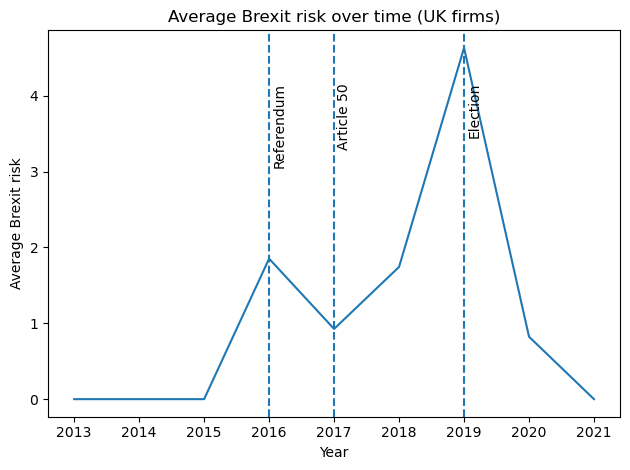

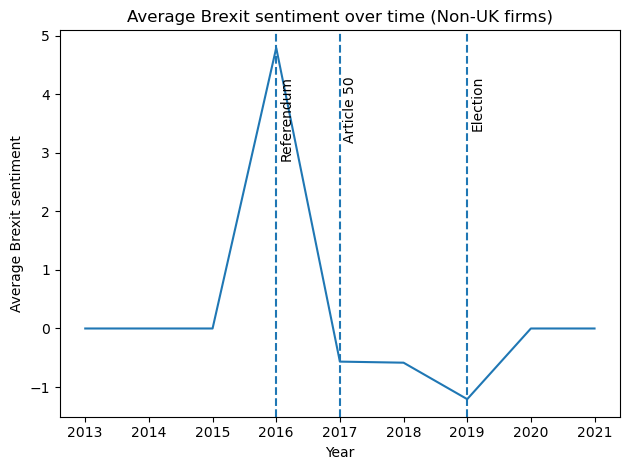

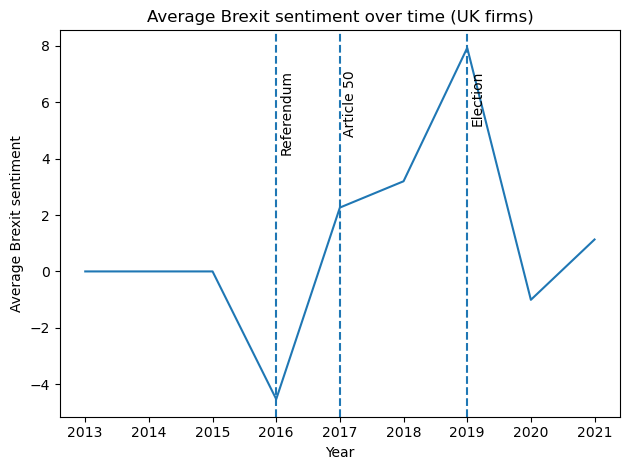

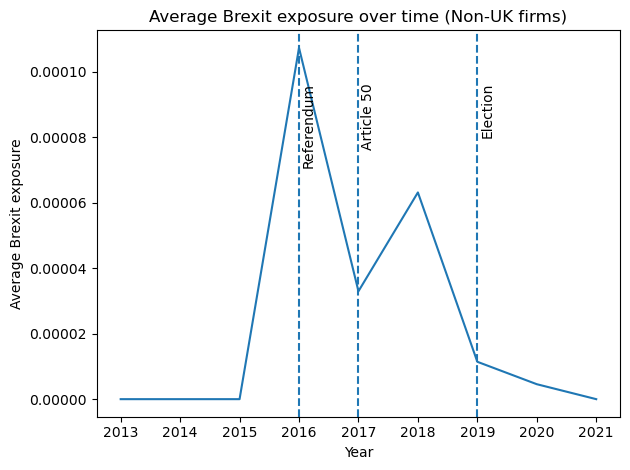

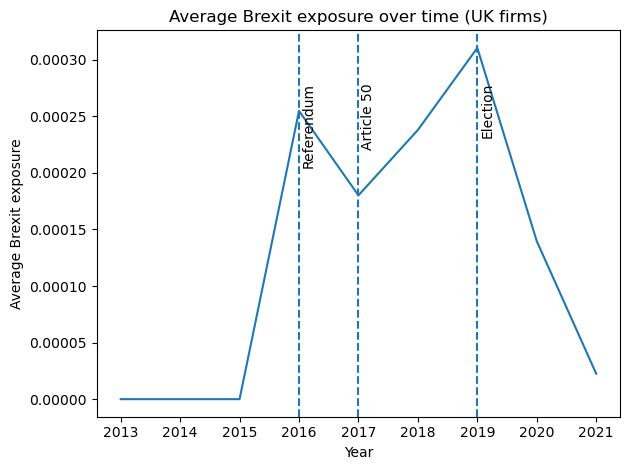

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# UK / Non-UK flag
if "region" not in analysis_df.columns:
    analysis_df["region"] = analysis_df["ticker"].map(
        lambda t: COMPANY_INFO.get(t, ("", "Other"))[1]
    )

analysis_df["uk_flag"] = np.where(analysis_df["region"] == "UK", "UK", "Non-UK")

events = {
    2016: "Referendum",
    2017: "Article 50",
    2019: "Election",
}

def plot_time_series(metric, metric_label):
    for group in ["Non-UK", "UK"]:
        sub = analysis_df[analysis_df["uk_flag"] == group]
        ts = (
            sub.groupby("year")[metric]
               .mean()
               .reset_index()
               .sort_values("year")
        )

        plt.figure()
        plt.plot(ts["year"], ts[metric])
        plt.xlabel("Year")
        plt.ylabel(f"Average {metric_label}")
        plt.title(f"Average {metric_label} over time ({group} firms)")

        y_max = ts[metric].max()
        for x, label in events.items():
            plt.axvline(x=x, linestyle="--")
            plt.text(x + 0.05, y_max * 0.9, label, rotation=90, va="top")

        plt.tight_layout()

# 1) Non-UK / UK BrexitRisk
plot_time_series("BrexitRisk", "Brexit risk")

# 2) Non-UK / UK BrexitSentiment
plot_time_series("BrexitSentiment", "Brexit sentiment")

# 3) Non-UK / UK BrexitExposure
plot_time_series("BrexitExposure", "Brexit exposure")


# Cross-firm comparison

(              company  BrexitExposure
 2            Barclays        0.000683
 5                Ford        0.000220
 3                 DHL        0.000112
 0         AstraZeneca        0.000061
 11           Unilever        0.000048
 9               Tesco        0.000046
 1                  BP        0.000006
 10             Toyota        0.000006
 6   Johnson & Johnson        0.000005
 4         Eli & Lilly        0.000000
 7         Kraft Heinz        0.000000
 8              Kroger        0.000000,
               company  BrexitRisk
 2            Barclays    7.056277
 3                 DHL    1.852273
 5                Ford    0.705628
 1                  BP    0.000000
 0         AstraZeneca    0.000000
 4         Eli & Lilly    0.000000
 6   Johnson & Johnson    0.000000
 7         Kraft Heinz    0.000000
 8              Kroger    0.000000
 9               Tesco    0.000000
 10             Toyota    0.000000
 11           Unilever    0.000000,
               company  BrexitSentim

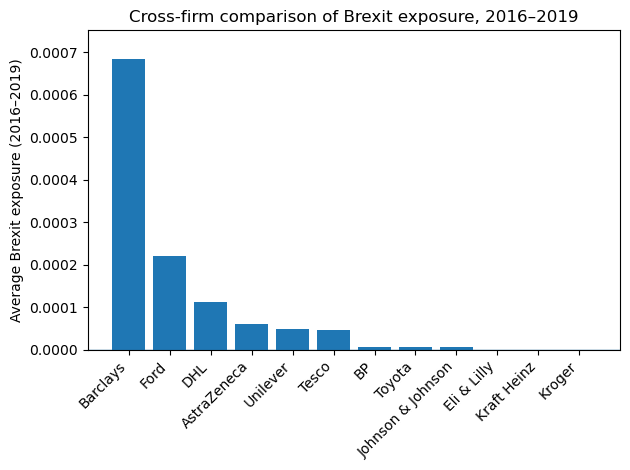

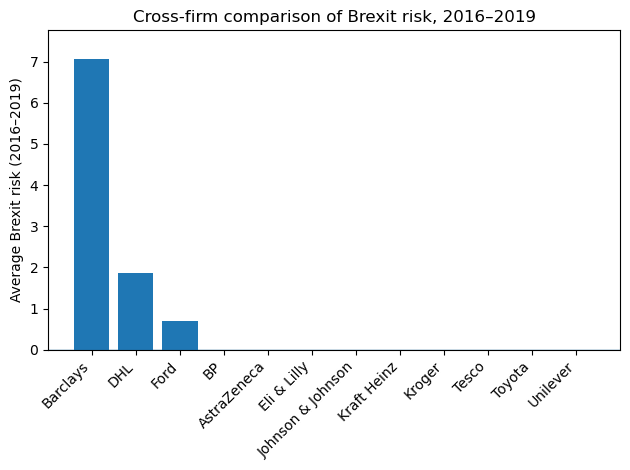

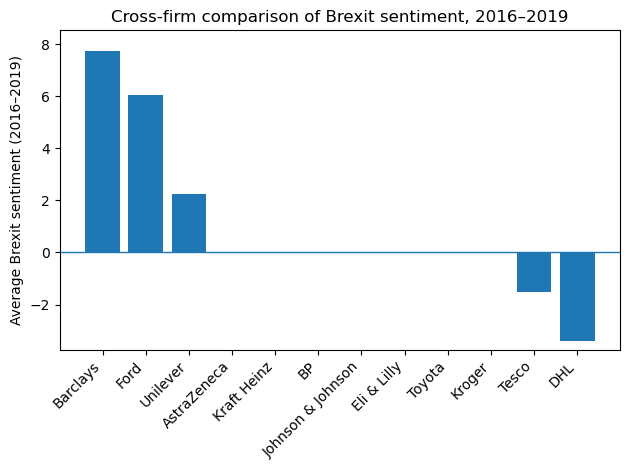

In [48]:
# Cross-firm comparison over the Brexit period (2016–2019)
brexit_start, brexit_end = 2016, 2019
mask_1619 = (analysis_df["year"] >= brexit_start) & (analysis_df["year"] <= brexit_end)

def cross_firm_1619(metric, label):
    summary = (
        analysis_df[mask_1619]
        .groupby("company")[metric]
        .mean()
        .reset_index()
        .sort_values(metric, ascending=False)
    )

    plt.figure()
    plt.bar(summary["company"], summary[metric])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(f"Average {label} ({brexit_start}–{brexit_end})")
    plt.title(f"Cross-firm comparison of {label}, {brexit_start}–{brexit_end}")

    # Make sure negative values go below the x-axis (0 line)
    y_min = min(0, summary[metric].min())
    y_max = max(0, summary[metric].max())
    plt.axhline(0, linewidth=1)  # draw x-axis at 0
    plt.ylim(y_min * 1.1, y_max * 1.1)

    plt.tight_layout()

    return summary


# 1) Brexit exposure
avg_exposure_1619 = cross_firm_1619("BrexitExposure", "Brexit exposure")

# 2) Brexit risk
avg_risk_1619 = cross_firm_1619("BrexitRisk", "Brexit risk")

# 3) Brexit sentiment
avg_sent_1619 = cross_firm_1619("BrexitSentiment", "Brexit sentiment")

avg_exposure_1619, avg_risk_1619, avg_sent_1619


# Heatmap

year,2013,2014,2015,2016,2017,2018,2019,2020,2021
company,,,,,,,,,
AstraZeneca,0.0,0.0,0.0,0.0001,0.0000,0.0001,0.0001,0.0000,0.0000
BP,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Barclays,0.0,0.0,0.0,0.0009,0.0006,0.0006,0.0007,0.0003,0.0001
DHL,0.0,0.0,0.0,0.0001,0.0000,0.0003,0.0000,0.0000,0.0000
Eli & Lilly,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Ford,0.0,0.0,0.0,0.0004,0.0002,0.0001,0.0000,0.0000,0.0000
Johnson & Johnson,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Kraft Heinz,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Kroger,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


year,2013,2014,2015,2016,2017,2018,2019,2020,2021
company,,,,,,,,,
AstraZeneca,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
BP,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Barclays,0.0,0.0,0.0,7.4091,2.9636,4.9394,12.3485,2.4697,0.0
DHL,0.0,0.0,0.0,0.0000,0.0000,7.4091,0.0000,0.0000,0.0
Eli & Lilly,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Ford,0.0,0.0,0.0,1.8523,0.0000,0.0000,0.0000,0.0000,0.0
Johnson & Johnson,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Kraft Heinz,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Kroger,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0


year,2013,2014,2015,2016,2017,2018,2019,2020,2021
company,,,,,,,,,
AstraZeneca,0.0,0.0,0.0,0.0000,0.0000,4.5278,-4.5278,0.0000,0.0000
BP,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Barclays,0.0,0.0,0.0,-18.1111,7.2444,6.0370,27.1667,-3.0185,3.0185
DHL,0.0,0.0,0.0,0.0000,0.0000,-4.5278,-9.0556,0.0000,0.0000
Eli & Lilly,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Ford,0.0,0.0,0.0,18.1111,-3.6222,0.0000,0.0000,0.0000,0.0000
Johnson & Johnson,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Kraft Heinz,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Kroger,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


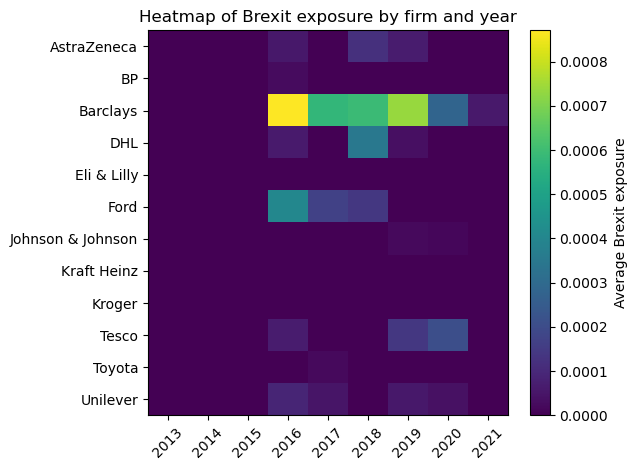

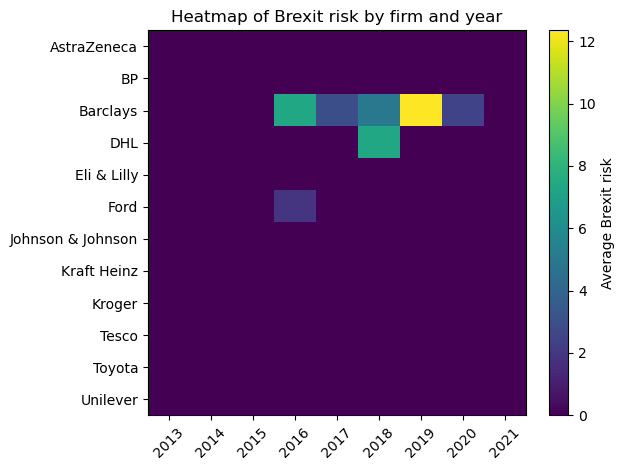

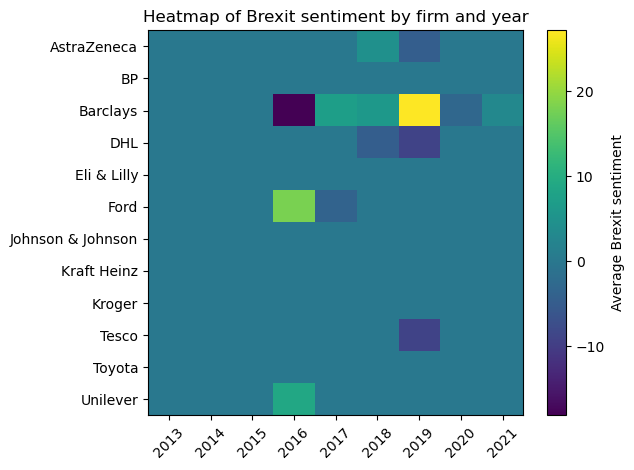

In [49]:
metrics = [
    ("BrexitExposure",  "Brexit exposure"),
    ("BrexitRisk",      "Brexit risk"),
    ("BrexitSentiment", "Brexit sentiment"),
]

for col, label in metrics:
    pivot = analysis_df.pivot_table(
        index="company",
        columns="year",
        values=col,
        aggfunc="mean",
    )

    plt.figure()
    plt.imshow(pivot, aspect="auto")
    plt.colorbar(label=f"Average {label}")
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
    plt.title(f"Heatmap of {label} by firm and year")
    plt.tight_layout()

    display(pivot.round(4))


# 

# Statistical test

* pre vs post 2016 change in BrexitRisk

In [50]:
pre_period  = analysis_df[analysis_df["year"] <= 2015]["BrexitRisk"]
post_period = analysis_df[(analysis_df["year"] >= 2016) & (analysis_df["year"] <= 2019)]["BrexitRisk"]

t_stat, p_val = ttest_ind(post_period, pre_period, equal_var=False)

print("Pre-2016 mean BrexitRisk:", pre_period.mean())
print("2016–2019 mean BrexitRisk:", post_period.mean())
print("t-statistic:", t_stat)
print("p-value:", p_val)

Pre-2016 mean BrexitRisk: 0.0
2016–2019 mean BrexitRisk: 1.0033143939393938
t-statistic: 3.0460204979307526
p-value: 0.002646656471491231
